In [1]:
import numpy as np
import yt

/home/mturk/yt/yt/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/mturk/.config/yt/ytrc is deprecated in favor of /home/mturk/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0 . This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [2]:
yt.__version__

'4.0.dev0'

In [3]:
# ds = yt.load_sample("IsolatedGalaxy")
ds = yt.load("/home/mturk/Documents/2021-03-26-eht-yt-workshop/IsolatedGalaxy/galaxy0030/galaxy0030")

yt : [INFO     ] 2021-03-26 11:59:37,184 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2021-03-26 11:59:37,185 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2021-03-26 11:59:37,186 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-03-26 11:59:37,187 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-03-26 11:59:37,188 Parameters: cosmological_simulation   = 0.0


In [4]:
len(ds.parameters)

402

In [5]:
ds.current_time

unyt_quantity(0.00600002, 'code_time')

In [6]:
ds.parameters["InitialTime"]

0.0060000200028298

In [7]:
t = ds.current_time

In [8]:
yt.units.Mpc / t

unyt_quantity(166.66611103, 'Mpc/code_time')

In [9]:
(yt.units.Mpc / t).in_cgs()

unyt_quantity(2.20771287e+08, 'cm/s')

In [10]:
(yt.units.Mpc / t).in_base()

unyt_quantity(2.20771287e+08, 'cm/s')

In [11]:
ds.domain_width

In [12]:
ds.domain_left_edge, ds.domain_right_edge

(unyt_array([0., 0., 0.], 'code_length'),
 unyt_array([1., 1., 1.], 'code_length'))

In [13]:
ds.fields

Parsing Hierarchy :  99%|█████████▉| 172/173 [00:00<00:00, 7559.84it/s]
yt : [INFO     ] 2021-03-26 11:59:37,483 Gathering a field list (this may take a moment.)


In [14]:
p = yt.ProjectionPlot(ds, "z", "density")

yt : [INFO     ] 2021-03-26 11:59:41,081 Projection completed
yt : [INFO     ] 2021-03-26 11:59:41,082 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:41,083 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:41,084 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:41,084 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:41,086 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



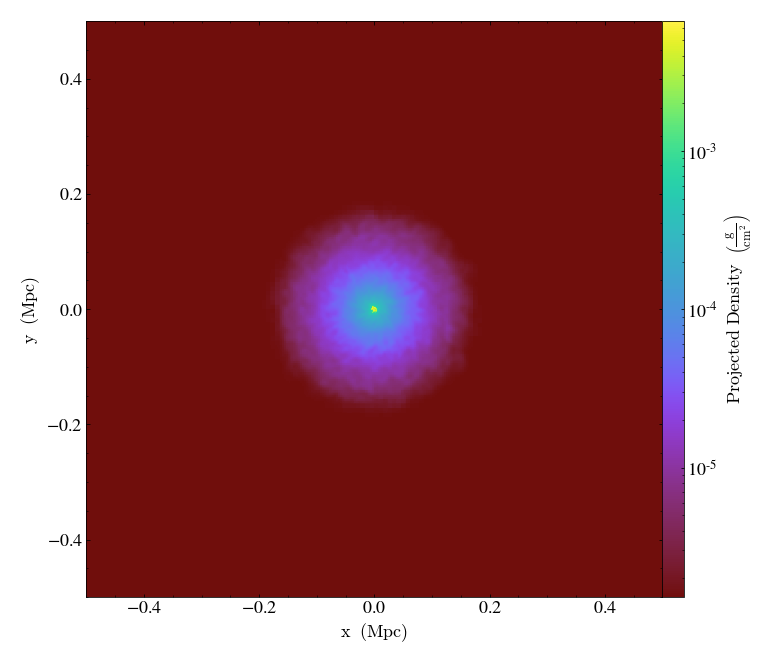

In [15]:
p


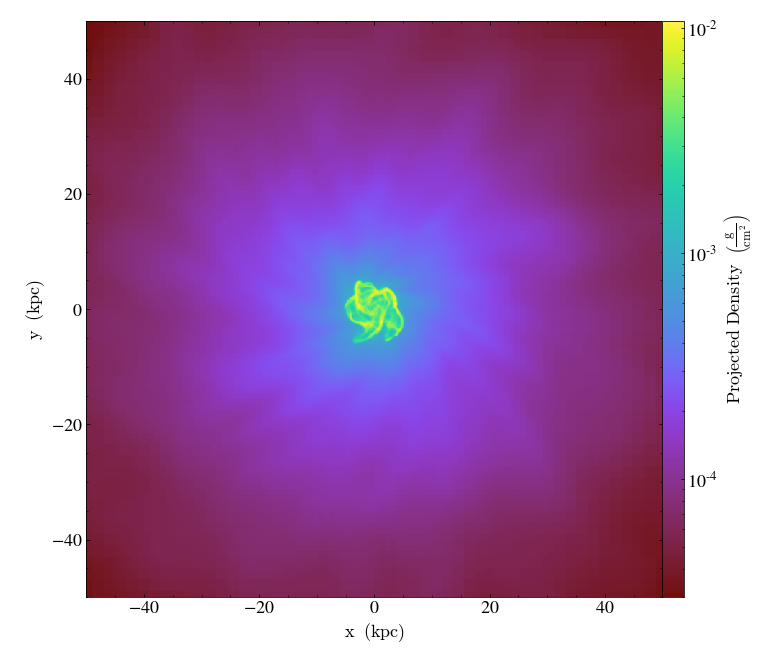

In [16]:
p.zoom(10)


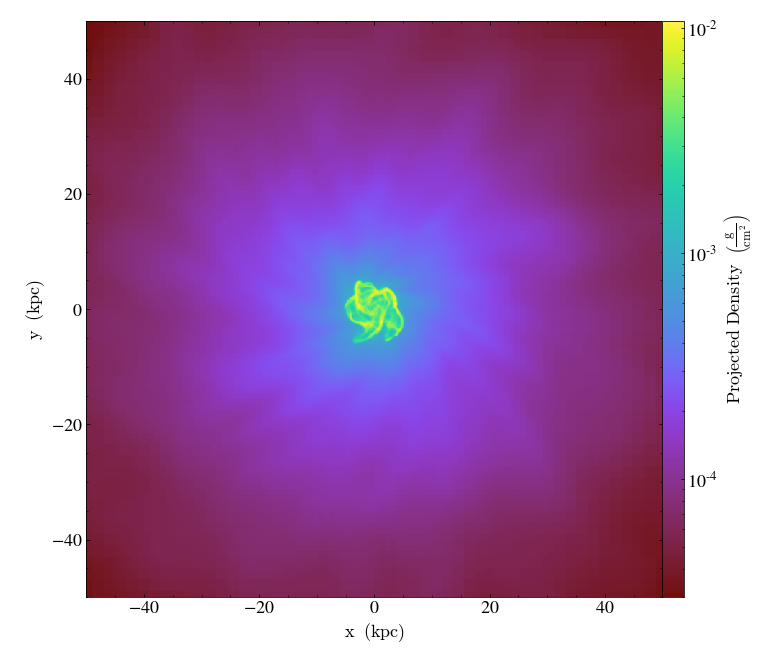

In [17]:
p.set_cmap("density", "arbre")

In [18]:
sp = ds.sphere("c", 0.1)

In [19]:
sp

YTSphere (galaxy0030): , center=[1.543e+24 1.543e+24 1.543e+24] cm cm, radius=3.086e+23 cm

yt : [INFO     ] 2021-03-26 11:59:44,637 Projection completed
yt : [INFO     ] 2021-03-26 11:59:44,639 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:44,640 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:44,642 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



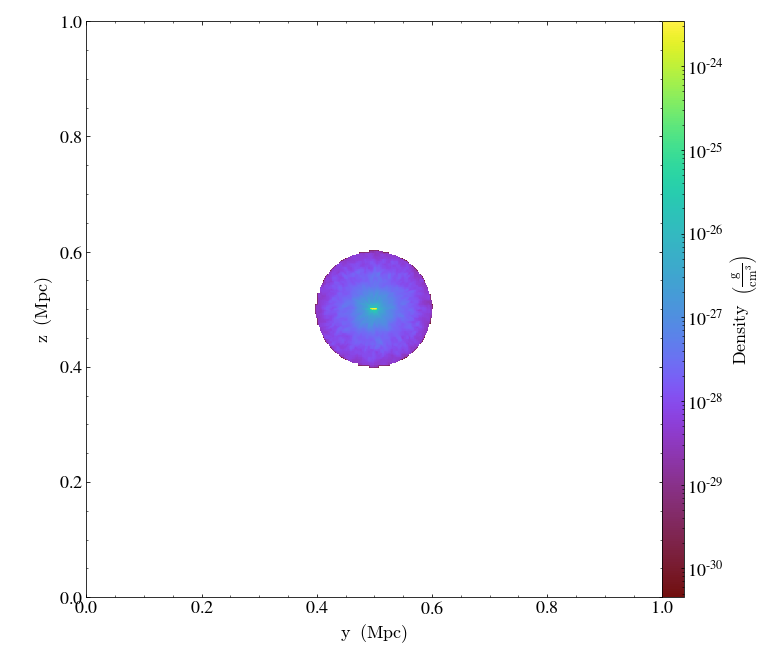

In [20]:
p = sp.max("density", axis="x").plot()

In [21]:
sp.argmax("density", axis="temperature")

unyt_quantity(20631.1796875, 'K')

In [22]:
sp.argmin("density", axis="velocity_magnitude")

unyt_quantity(5007089.69765811, 'cm/s')

yt : [INFO     ] 2021-03-26 11:59:46,453 Projection completed
yt : [INFO     ] 2021-03-26 11:59:46,455 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:46,455 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:46,457 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



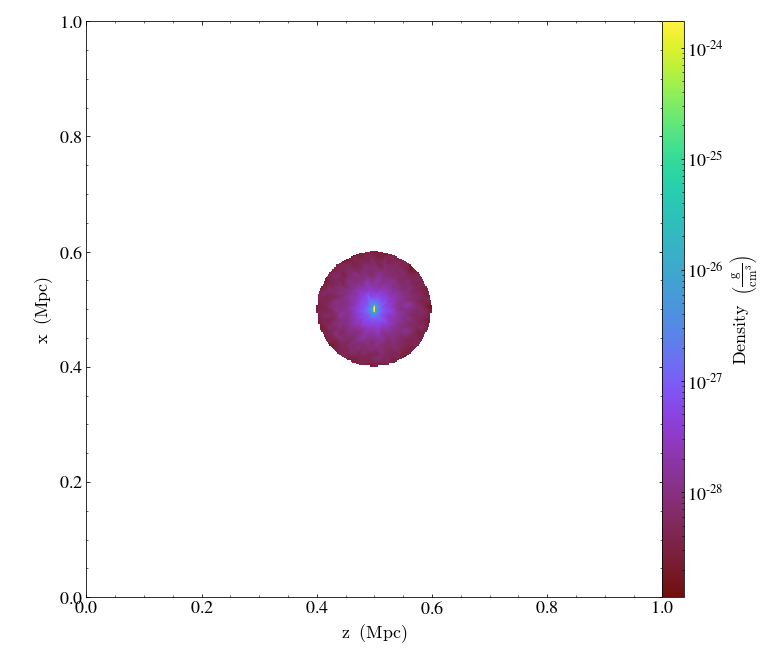


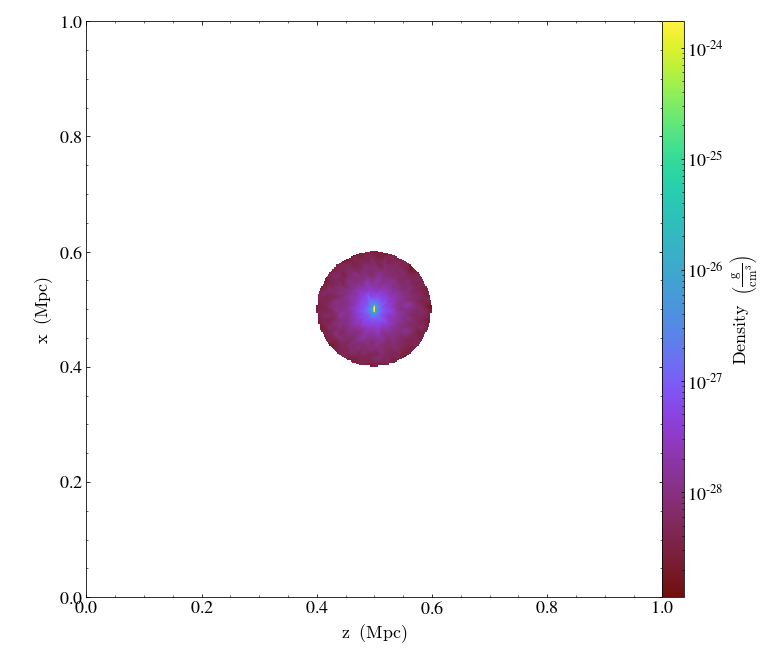

In [23]:
sp.mean("density", weight="density", axis="y").plot()

In [24]:
sp2 = ds.sphere("c", 0.15)

yt : [INFO     ] 2021-03-26 11:59:48,224 Projection completed
yt : [INFO     ] 2021-03-26 11:59:48,226 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:48,227 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:48,229 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



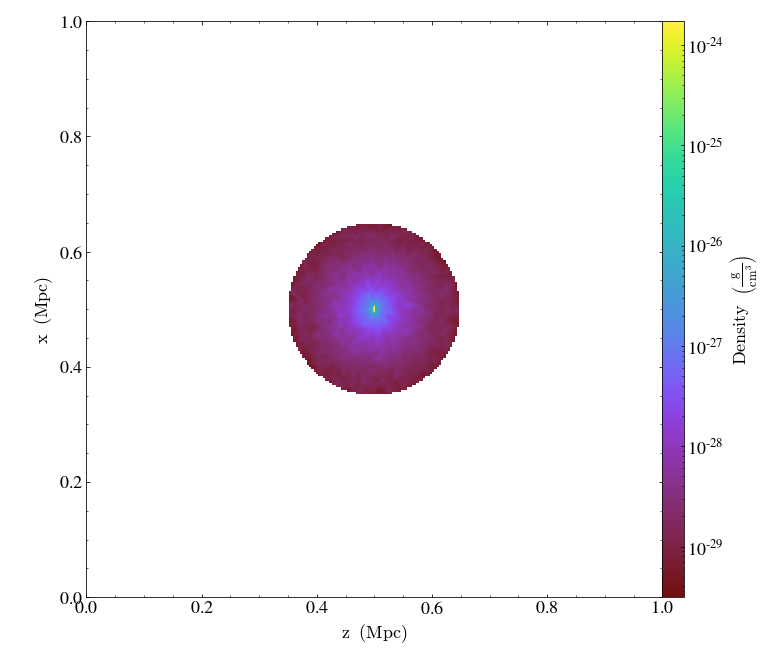

In [25]:
p2 = sp2.mean("density", weight="density", axis="y").plot()

In [26]:
shell = (sp2 - sp)

In [27]:
shell.max("density")

unyt_quantity(9.83369037e-29, 'g/cm**3')

yt : [INFO     ] 2021-03-26 11:59:49,428 Projection completed
yt : [INFO     ] 2021-03-26 11:59:49,430 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:49,431 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:49,432 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



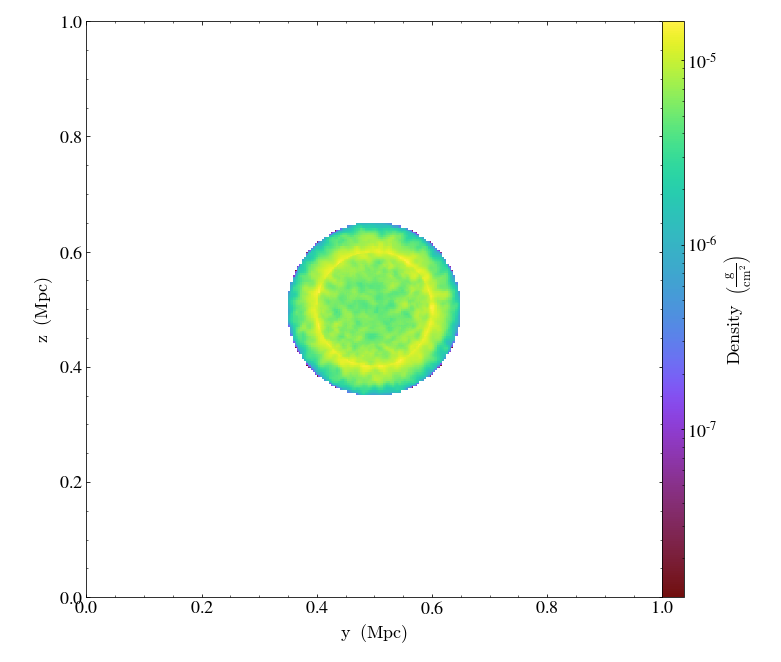

In [28]:
p3 = shell.integrate("density", axis="x").plot()

yt : [INFO     ] 2021-03-26 11:59:50,353 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:50,354 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:50,355 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:50,356 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:50,357 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



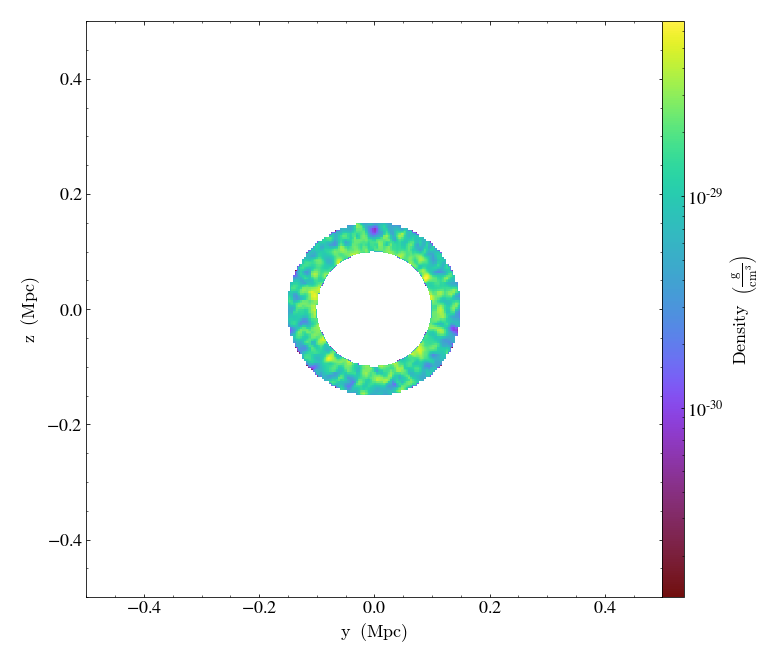

In [29]:
yt.SlicePlot(ds, "x", "density", data_source = shell)

In [30]:
excluded_hot = sp2.exclude_above("temperature", 1e4, "K")

yt : [INFO     ] 2021-03-26 11:59:52,079 Projection completed
yt : [INFO     ] 2021-03-26 11:59:52,081 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:52,081 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 11:59:52,083 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



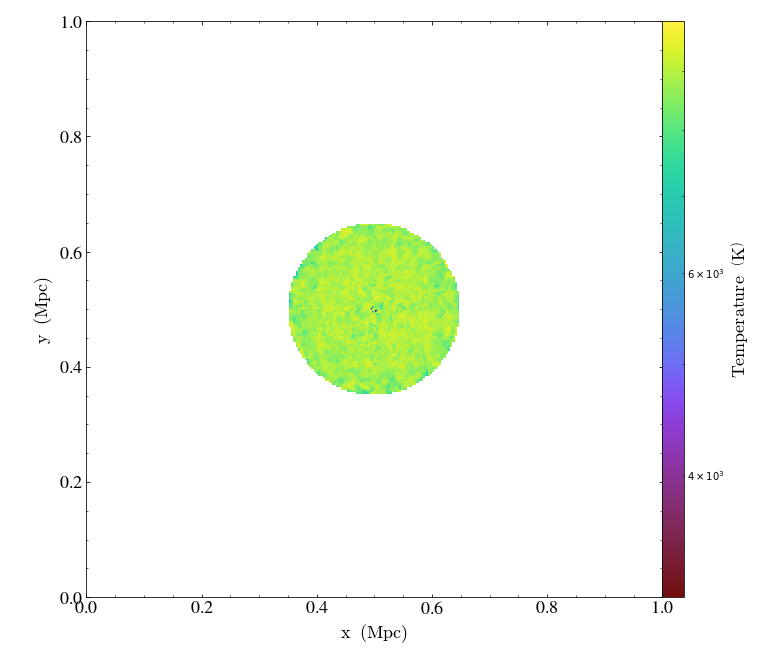

In [31]:
p4 = excluded_hot.mean("temperature", axis="z", weight="density").plot()


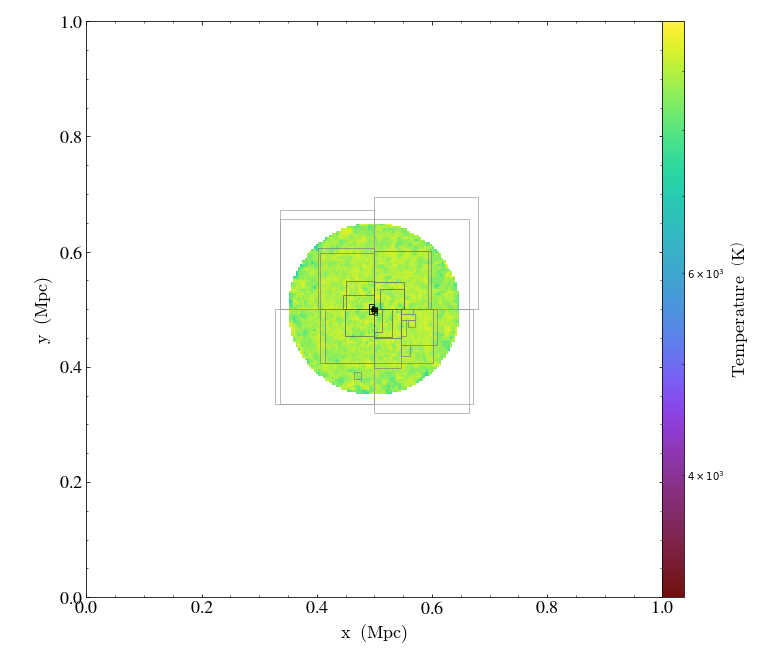

In [32]:
p4.annotate_grids()


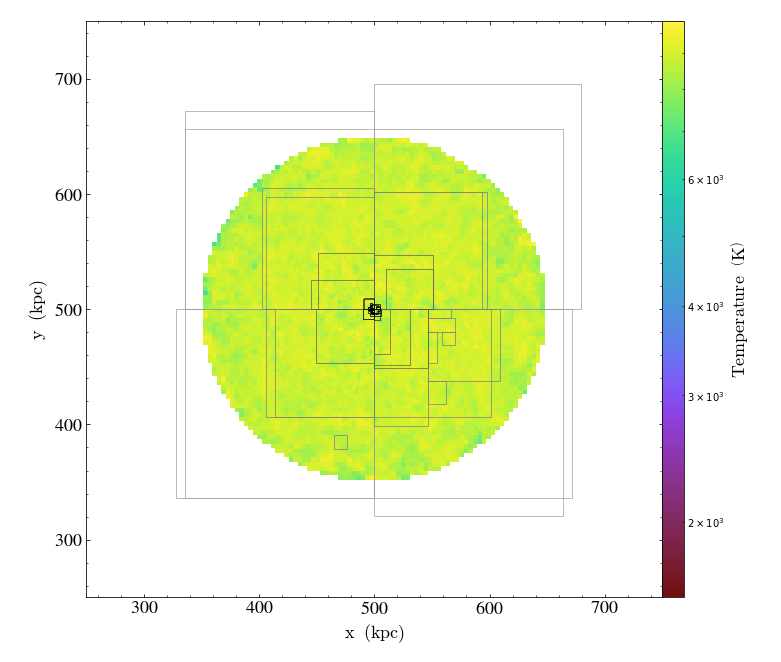

In [33]:
p4.zoom(2)

yt : [INFO     ] 2021-03-26 11:59:56,677 Projection completed



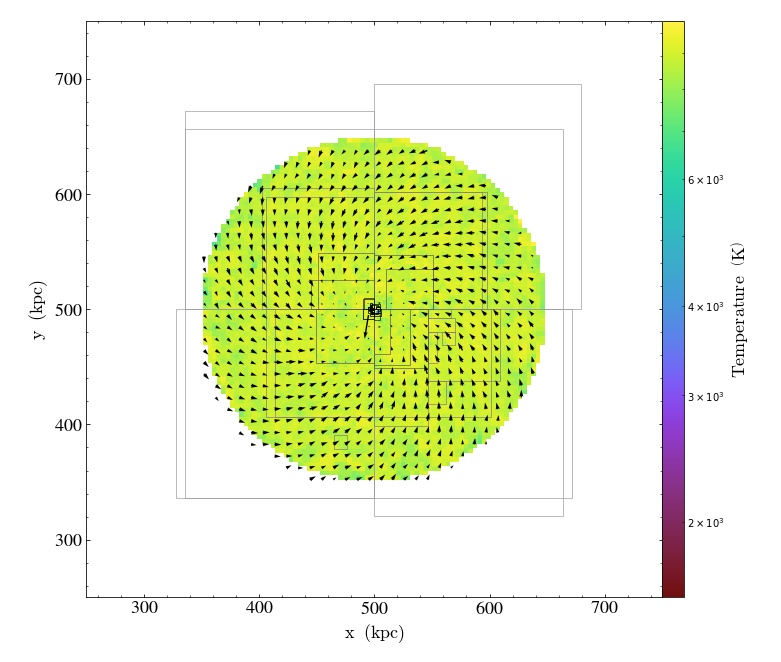

In [34]:
p4.annotate_velocity()

yt : [INFO     ] 2021-03-26 11:59:57,971 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



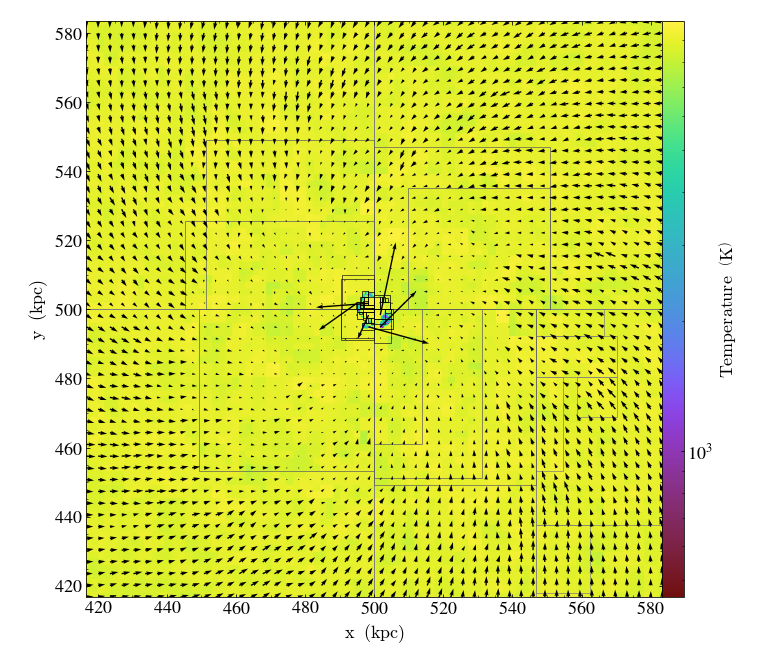

In [35]:
p4.zoom(3)


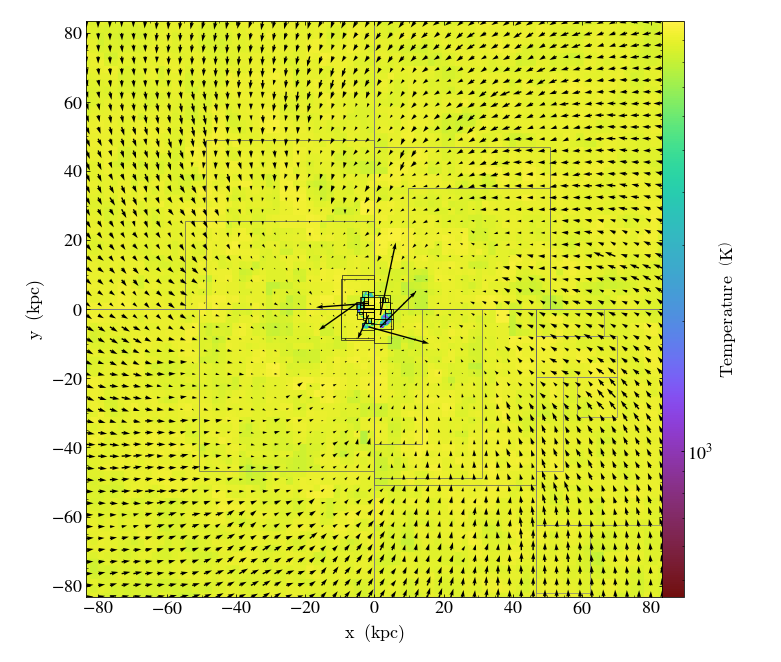

In [36]:
p4.set_origin('center-window')


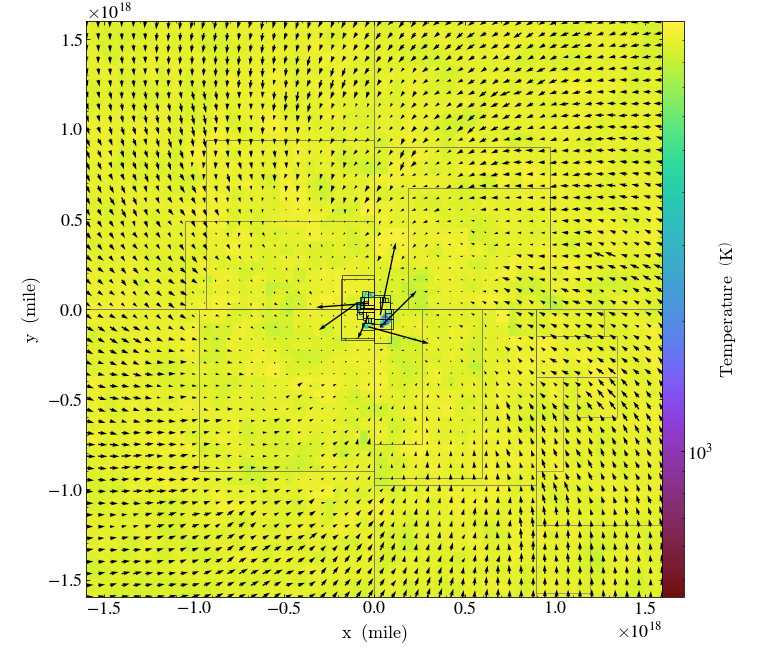

In [37]:
p4.set_axes_unit('mile')


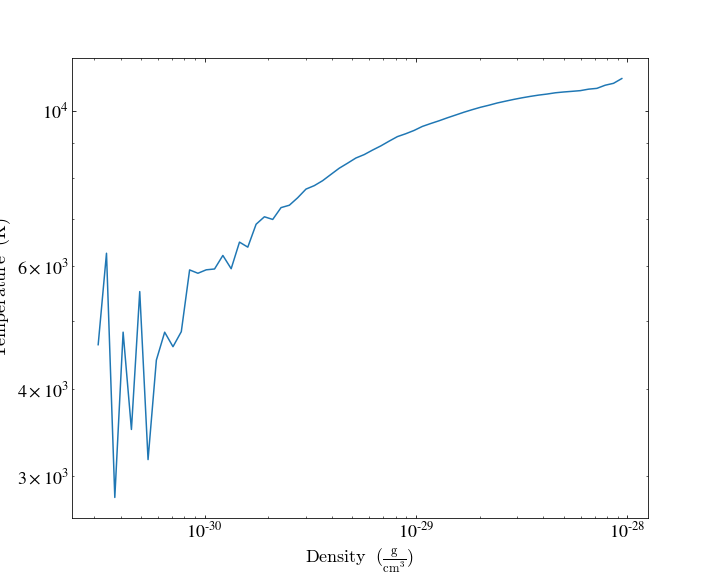

In [38]:
shell.profile("density", "temperature", weight_field="cell_mass").plot()


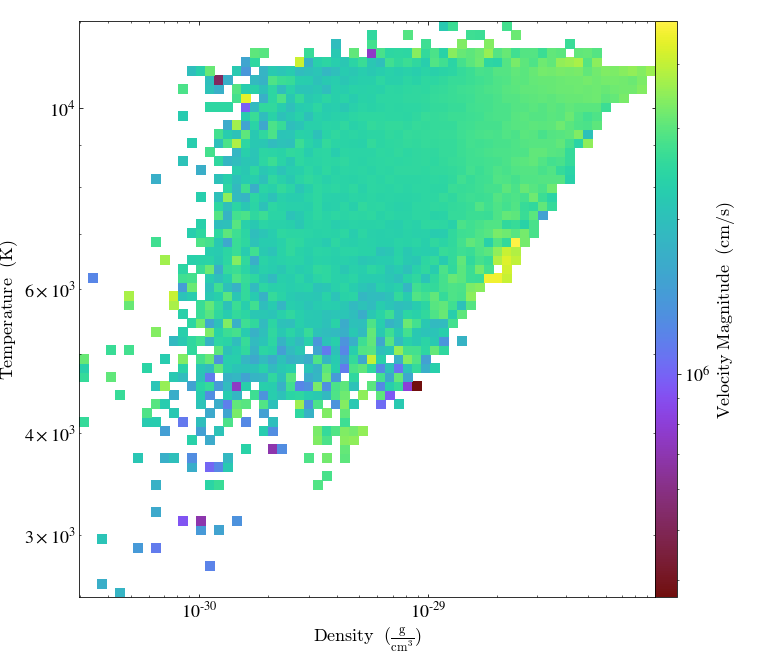

In [39]:
shell.profile(["density", "temperature"], "velocity_magnitude", weight_field="cell_mass").plot()


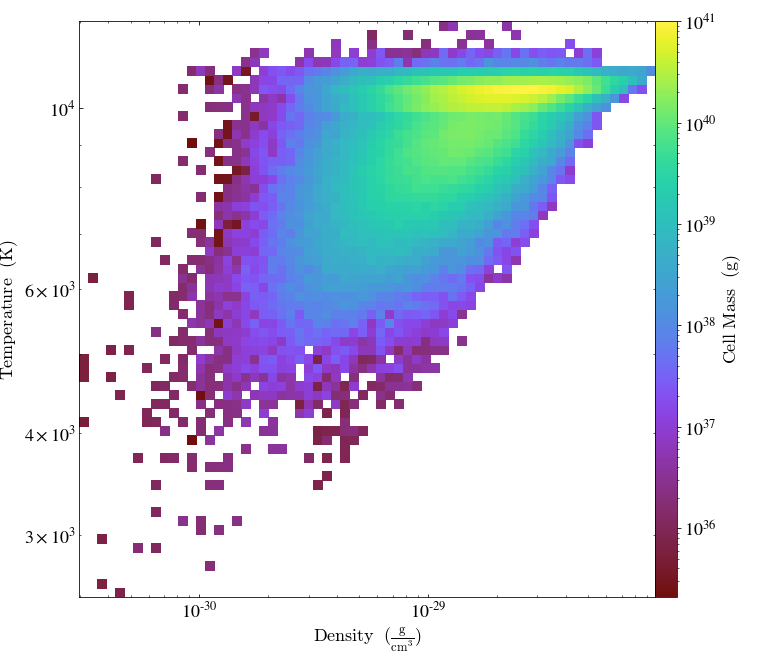

In [40]:
shell.profile(["density", "temperature"], "cell_mass", weight_field=None).plot()

yt : [INFO     ] 2021-03-26 12:00:05,570 Projection completed
yt : [INFO     ] 2021-03-26 12:00:05,572 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 12:00:05,573 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 12:00:05,574 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



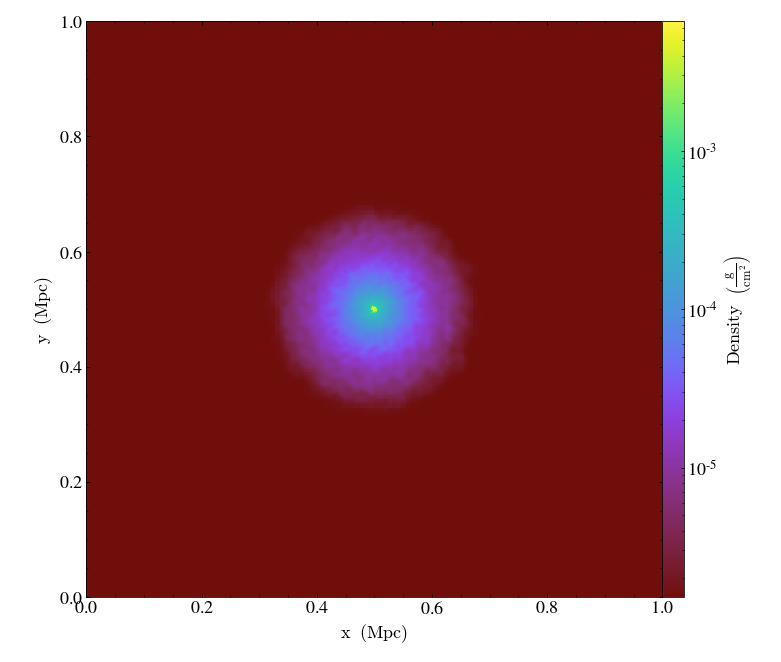


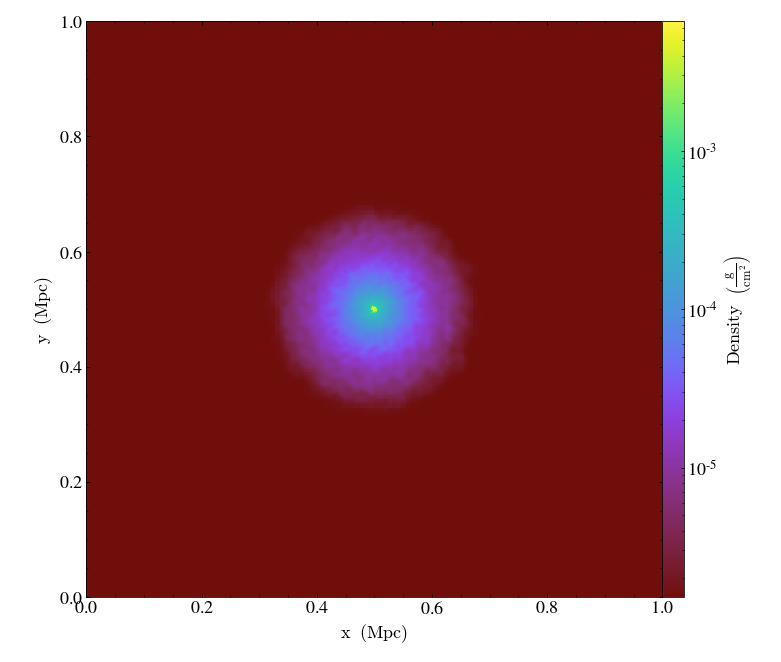

In [41]:
ds.r[:].integrate("density", axis="z").plot()

yt : [INFO     ] 2021-03-26 12:00:06,993 Projection completed
yt : [INFO     ] 2021-03-26 12:00:06,995 xlim = 0.450000 0.550000
yt : [INFO     ] 2021-03-26 12:00:06,996 ylim = 0.450000 0.550000
yt : [INFO     ] 2021-03-26 12:00:06,998 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



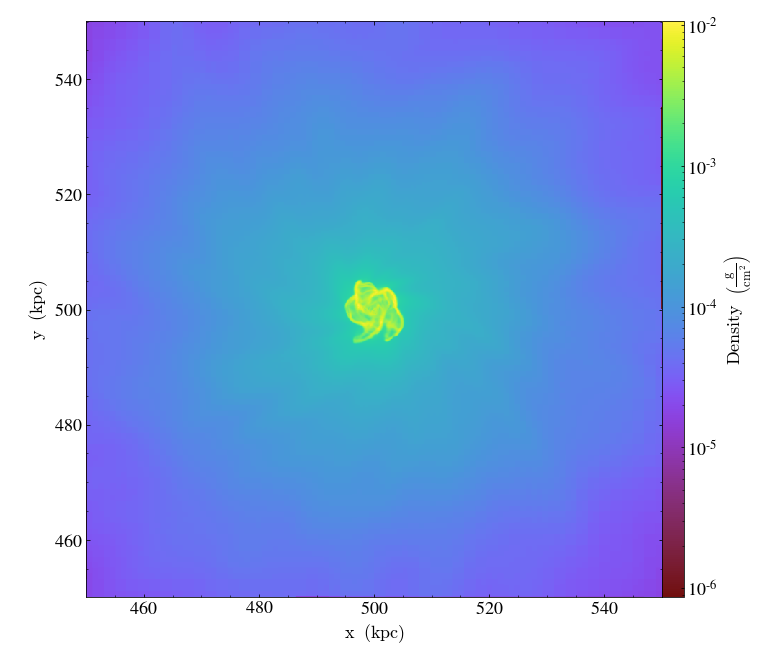


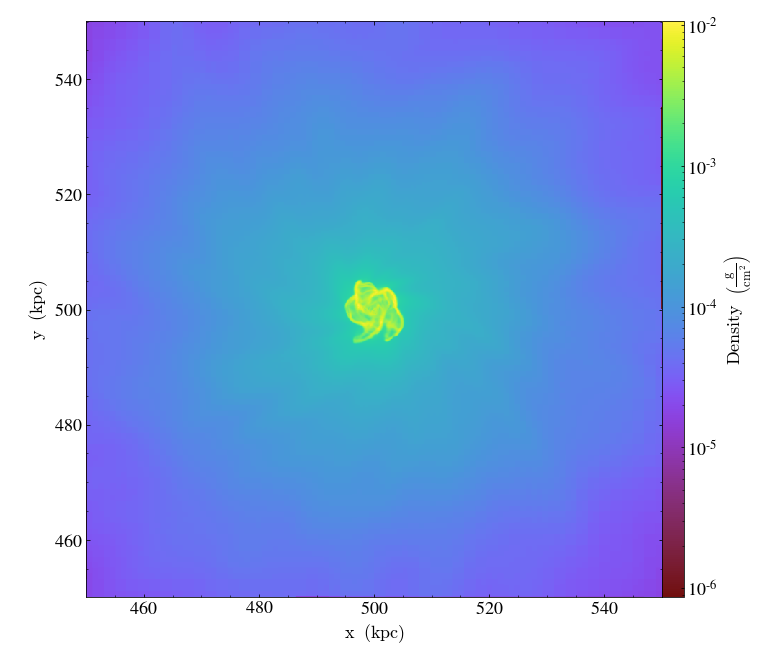

In [42]:
ds.r[0.45:0.55, 0.45:0.55, 0.45:0.55].integrate("density", axis="z").plot()

yt : [INFO     ] 2021-03-26 12:00:08,940 Projection completed
yt : [INFO     ] 2021-03-26 12:00:08,942 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 12:00:08,943 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 12:00:08,945 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



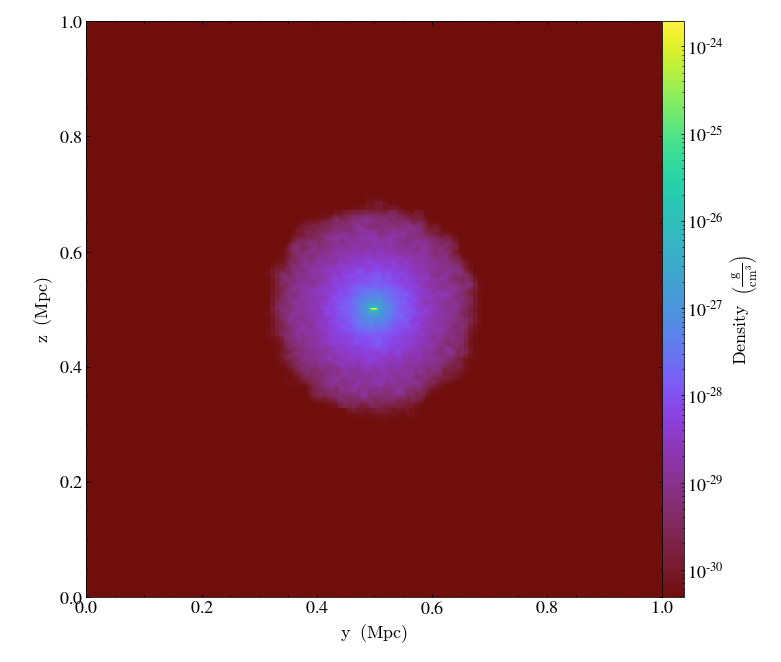


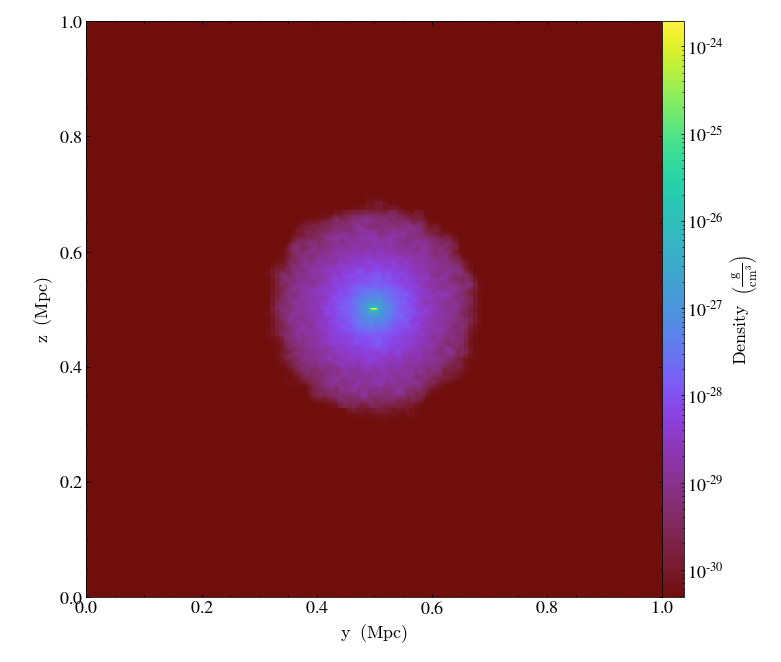

In [43]:
ds.r[ (400, 'kpc'):(600, 'kpc'), :, :].mean("density", axis="x", weight="density").plot()

yt : [INFO     ] 2021-03-26 12:00:10,262 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 12:00:10,263 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 12:00:10,265 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2021-03-26 12:00:10,485 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



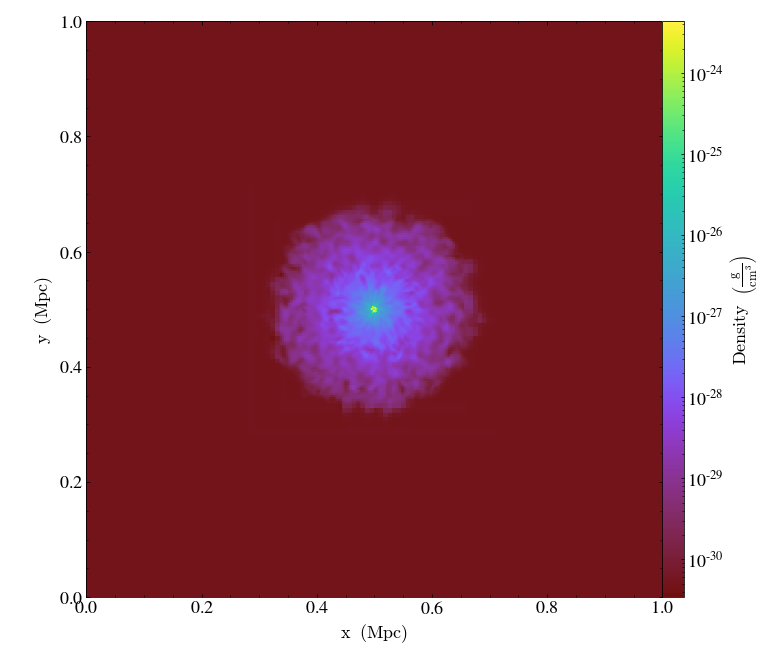


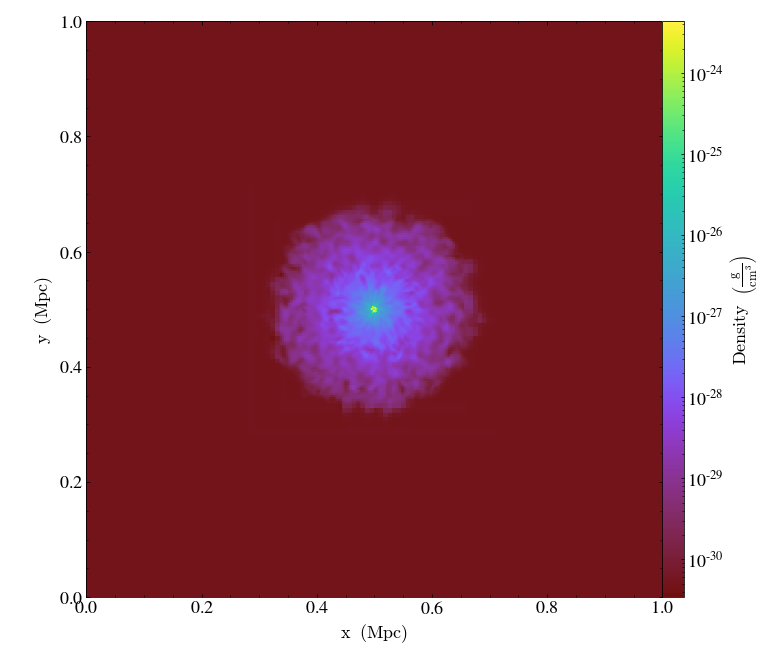

In [44]:
ds.r[:,:,0.5].plot("density")

In [45]:
ds.r[::128j, ::128j, 0.5]

In [46]:
import matplotlib.pyplot as plt

In [47]:
rho = ds.r[::128j, ::128j, 0.5]["density"]

yt : [INFO     ] 2021-03-26 12:00:11,829 Making a fixed resolution buffer of (density) 128 by 128


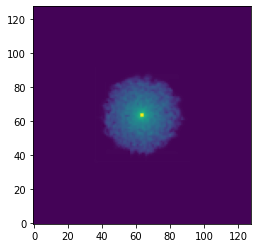

In [48]:
plt.imshow(np.log10(rho), origin="lower")

In [49]:
reg = ds.r[0.47:0.53, 0.47:0.53, 0.47:0.53]

In [50]:
reg

YTRegion (galaxy0030): , center=[1.543e+24 1.543e+24 1.543e+24] cm cm, left_edge=[1.45042e+24 1.45042e+24 1.45042e+24] cm cm, right_edge=[1.63558e+24 1.63558e+24 1.63558e+24] cm cm

In [51]:
reg["density"]

unyt_array([2.05686132e-27, 1.98130330e-27, 1.88577721e-27, ...,
            1.12879234e-25, 1.59561490e-25, 1.09824903e-24], 'g/cm**3')

In [52]:
reg["x"]

unyt_array([1.54337671e+24, 1.54337671e+24, 1.54337671e+24, ...,
            1.53979797e+24, 1.53979797e+24, 1.53979797e+24], 'cm')

In [53]:
agrid = ds.r[0.47:0.53:256j, 0.47:0.53:256j, 0.47:0.53:256j]

In [54]:
agrid["density"].shape

(256, 256, 256)

In [55]:
agrid["velocity_magnitude"]

unyt_array([[[15582968.67512066, 15582968.67512066, 15582968.67512066,
              ..., 15335364.88060321, 15335364.88060321,
              15335364.88060321],
             [15582968.67512066, 15582968.67512066, 15582968.67512066,
              ..., 15335364.88060321, 15335364.88060321,
              15335364.88060321],
             [15582968.67512066, 15582968.67512066, 15582968.67512066,
              ..., 15335364.88060321, 15335364.88060321,
              15335364.88060321],
             ...,
             [15594915.83178372, 15594915.83178372, 15594915.83178372,
              ..., 15183177.14659904, 15183177.14659904,
              15183177.14659904],
             [15594915.83178372, 15594915.83178372, 15594915.83178372,
              ..., 15183177.14659904, 15183177.14659904,
              15183177.14659904],
             [15594915.83178372, 15594915.83178372, 15594915.83178372,
              ..., 15183177.14659904, 15183177.14659904,
              15183177.14659904]],

        

In [56]:
def generate_dinosaurs(field, data):
    return data["density"] * data["temperature"]

In [57]:
ds.add_field("dinosaurs", generate_dinosaurs, sampling_type="cell", units="K * g/cm**3", force_override=True)

In [58]:
dd = ds.all_data()

In [59]:
dd["dinosaurs"]

unyt_array([4.60069427e-27, 4.62090710e-27, 4.61677430e-27, ...,
            1.33474260e-21, 1.84902519e-21, 1.11725109e-20], 'K*g/cm**3')

In [60]:
ds.add_gradient_fields("density")

[('gas', 'density_gradient_x'),
 ('gas', 'density_gradient_y'),
 ('gas', 'density_gradient_z'),
 ('gas', 'density_gradient_magnitude')]

yt : [INFO     ] 2021-03-26 12:00:20,259 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 12:00:20,260 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 12:00:20,261 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 12:00:20,262 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-26 12:00:20,264 Making a fixed resolution buffer of (('gas', 'density_gradient_x')) 800 by 800
yt : [WARNING  ] 2021-03-26 12:00:20,361 Plot image for field ('gas', 'density_gradient_x') has both positive and negative values. Min = -0.000000, Max = 0.000000.
yt : [WARNING  ] 2021-03-26 12:00:20,361 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2021-03-26 12:00:20,649 Making a fixed resolution buffer of (('gas', 'density_gradient_x')) 800 by 800



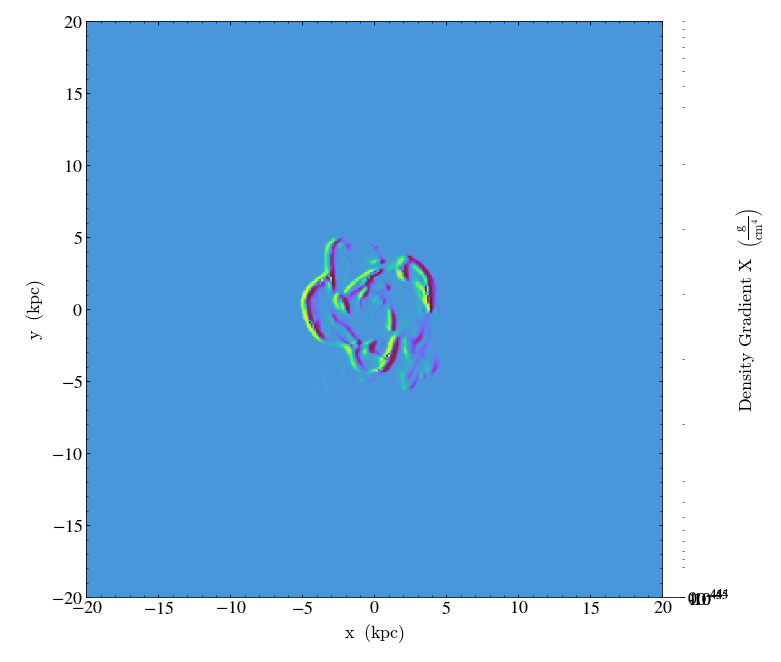

In [61]:
p = yt.SlicePlot(ds, "z", "density_gradient_x")
p.zoom(25)


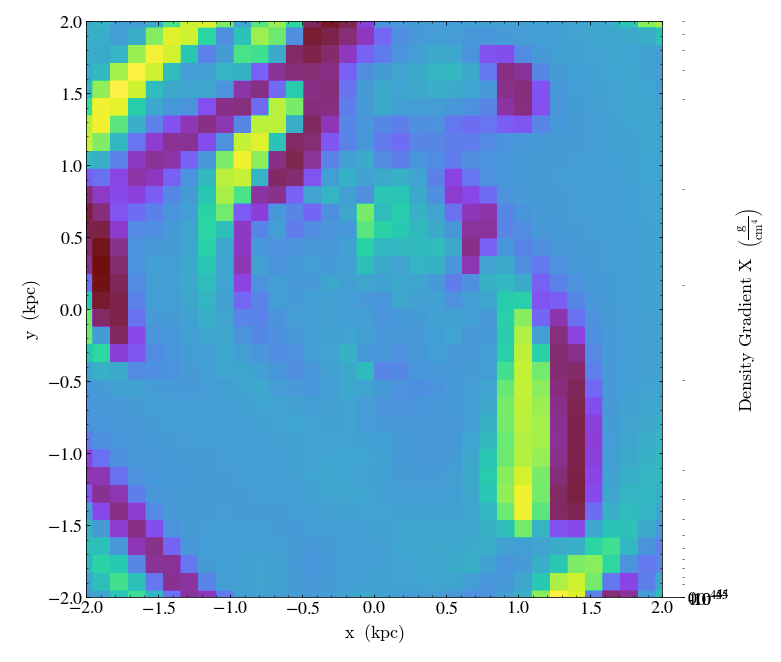

In [62]:
p.zoom(10)